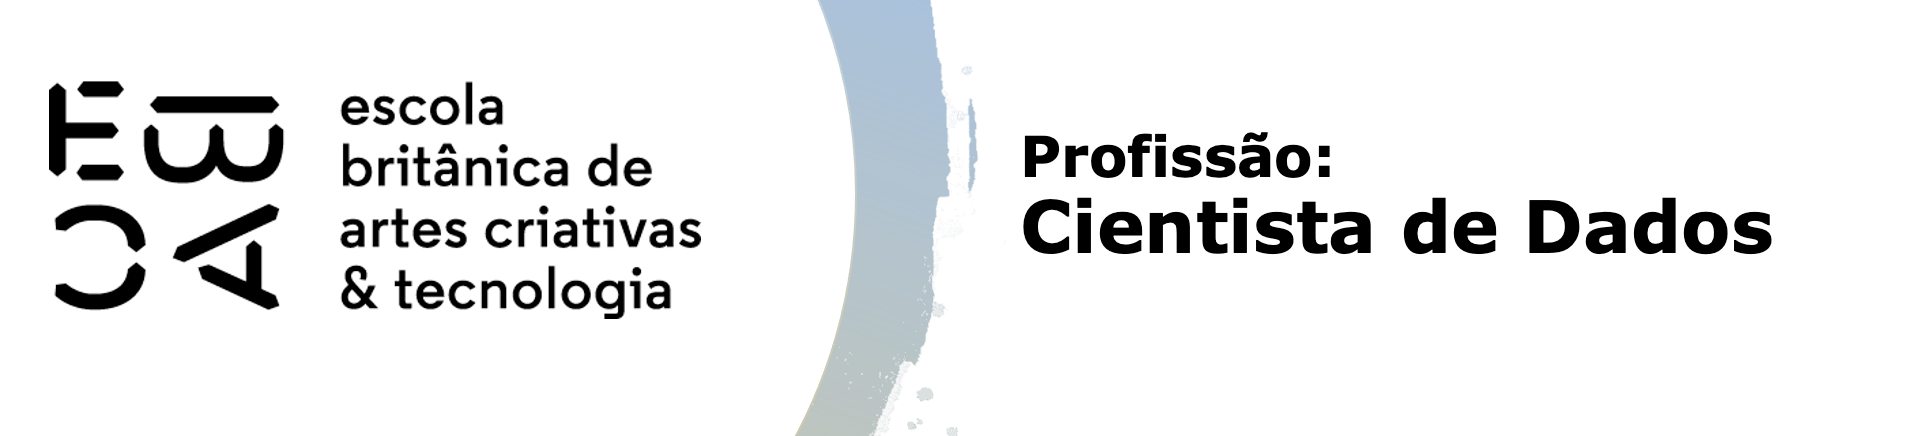

# Tarefa

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
pg = sns.load_dataset('penguins')

In [3]:
pg.groupby('sex')['body_mass_g'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,165.0,3862.272727,666.172050,2700.0,3350.0,3650.0,4550.0,5200.0
Male,168.0,4545.684524,787.628884,3250.0,3900.0,4300.0,5312.5,6300.0


<Axes: xlabel='sex', ylabel='body_mass_g'>

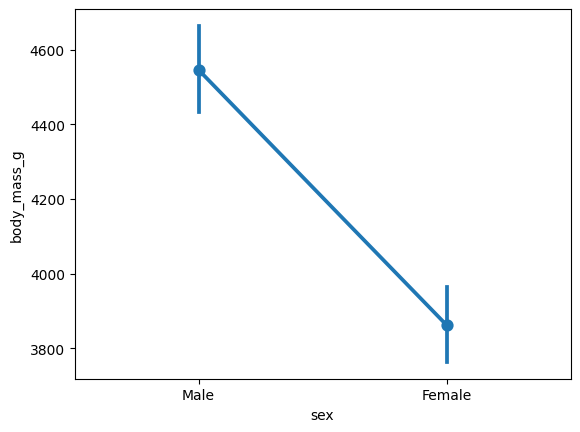

In [4]:
sns.pointplot(data=pg, x='sex', y = 'body_mass_g')

## 1) Diferença de peso entre machos e fêmeas

Na base de pinguins, podemos ver que há diferença de peso entre machos e fêmeas. Mas será que é uma conclusão extrapolável a toda a população de pinguins? Assumindo que essa amostra é aleatória e representativa da população de pinguins, realize um teste T com 5% de significância para verificar se podemos induzir esta conclusão para a população toda.

In [50]:
# Primeiramente iremos separar os dados por sexo do pinguim
penguin_male = pg[pg['sex'] == 'Male']['body_mass_g']
penguin_female = pg[pg['sex'] == 'Female']['body_mass_g']

# Agora prosseguiremos para o teste

test = st.ttest_ind(penguin_male, penguin_female)
if test.pvalue < 0.05:
    print('Rejeitamos a hipótese nula. Existe uma diferença significativa entre os pesos de machos e fêmeas.')
else:
    print('Mantemos a hipótese nula. Não existe uma diferença significativa entre os pesos de machos e fêmeas.')

Rejeitamos a hipótese nula. Existe uma diferença significativa entre os pesos de machos e fêmeas.


## 2) (opcional) Representação gráfica do teste

Siga os passos da aula para você poder visualizar a estatística do teste, sua distribuição e a região crítica do teste.

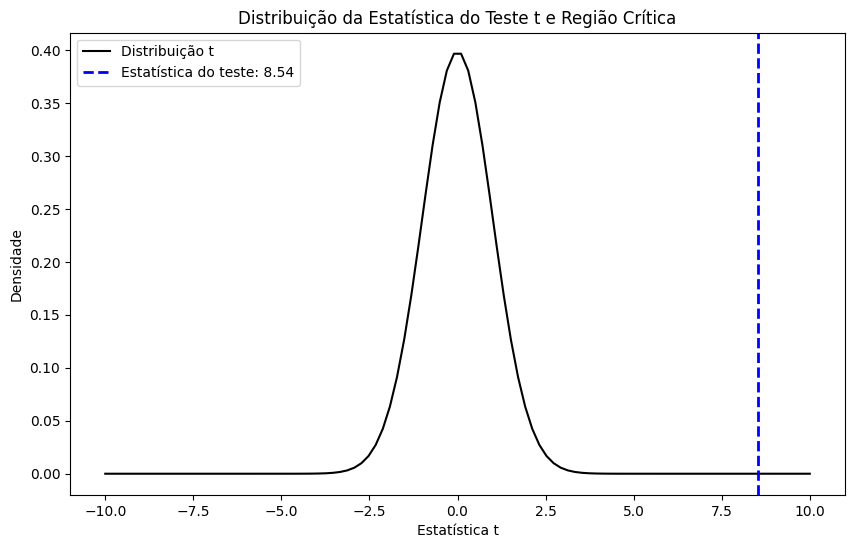

In [93]:
# Parâmetros do teste t
df = len(penguin_male) + len(penguin_female) - 2
alpha = 0.05

x = np.linspace(-10, 10, 100)
y = st.t.pdf(x, df)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Distribuição t', color='black')

plt.axvline(test.statistic, color='blue', linestyle='dashed', linewidth=2, label=f'Estatística do teste: {test.statistic:.2f}')
plt.title('Distribuição da Estatística do Teste t e Região Crítica')
plt.xlabel('Estatística t')
plt.ylabel('Densidade')
plt.legend()

## 3) Considere as espécies

Repita o exercício I, uma vez para cada espécie de pinguim. Qual é o *p-value* associado a cada raça?

In [69]:
male_gentoo = pg[(pg['sex']== 'Male') & (pg['species'] == 'Gentoo')]['body_mass_g']
female_gentoo = pg[(pg['sex']== 'Female') & (pg['species'] == 'Gentoo')]['body_mass_g']

male_adelie = pg[(pg['sex']== 'Male') & (pg['species'] == 'Adelie')]['body_mass_g']
female_adelie = pg[(pg['sex']== 'Female') & (pg['species'] == 'Adelie')]['body_mass_g']

male_chinstrap = pg[(pg['sex']== 'Male') & (pg['species'] == 'Chinstrap')]['body_mass_g']
female_chinstrap = pg[(pg['sex']== 'Female') & (pg['species'] == 'Chinstrap')]['body_mass_g']

In [82]:
test_gentoo = st.ttest_ind(male_gentoo, female_gentoo)
test_adelie = st.ttest_ind(male_adelie, female_adelie)
test_chinstrap = st.ttest_ind(male_chinstrap, female_chinstrap)

print(f'P-value do teste dos pinguins gentoo: {test_gentoo.pvalue}')
print(f'P-value do teste dos pinguins adelie: {test_adelie.pvalue}')
print(f'P-value do teste dos pinguins chinstrap: {test_chinstrap.pvalue}')


P-value do teste dos pinguins gentoo: 2.133687602018886e-28
P-value do teste dos pinguins adelie: 2.2206436307866114e-26
P-value do teste dos pinguins chinstrap: 2.043956471470739e-06
